In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv


In [2]:
df= pd.read_csv("../input/coffee-quality-data-cqi/df_arabica_clean.csv")
df.head(5)
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [5]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

# Data cleaning and preprocessing.

In [6]:
# Drop unnecessary columns
df.drop("Unnamed: 0", axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)
df.head(2)
df["Color"]

9           greenish
10          greenish
13     yellow- green
17      yellow-green
18          brownish
           ...      
197            green
201         greenish
203            green
204            green
206            green
Name: Color, Length: 69, dtype: object

In [7]:
# Convert categorical variables to numeric
category_cols = ['Owner', "Country of Origin","Producer","Processing Method"]
df = pd.get_dummies(df, columns=category_cols, drop_first=True)

In [8]:
df.Aftertaste.head(3)

9     8.08
10    8.00
13    8.00
Name: Aftertaste, dtype: float64

In [9]:
# Normalise numeric variables
numerical_cols=["Aroma","Flavor","Aftertaste","Acidity", "Body","Balance","Uniformity","Clean Cup","Sweetness","Total Cup Points"]
scaler=StandardScaler()
df[numerical_cols]= scaler.fit_transform(df[numerical_cols])

# Exploratory Data Analysis (EDA)

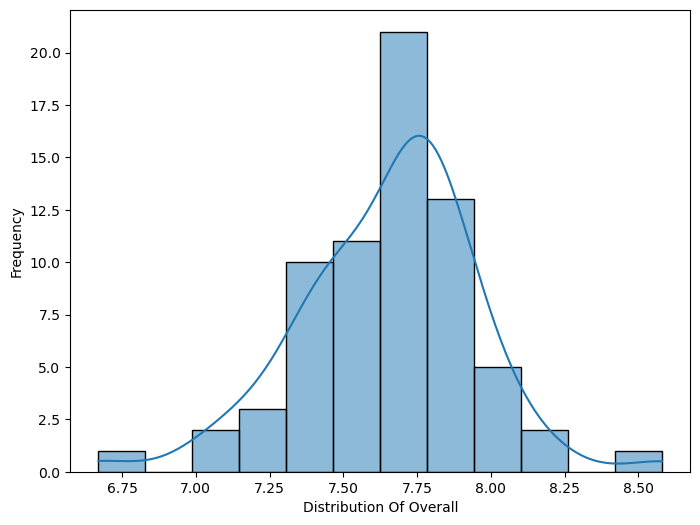

In [10]:
# Visualise the frequency of the target value "Clean Cup"
plt.figure(figsize=(8,6))
sns.histplot(df["Overall"], kde=True)
plt.xlabel("Distribution Of Overall")
plt.ylabel("Frequency")
plt.show()

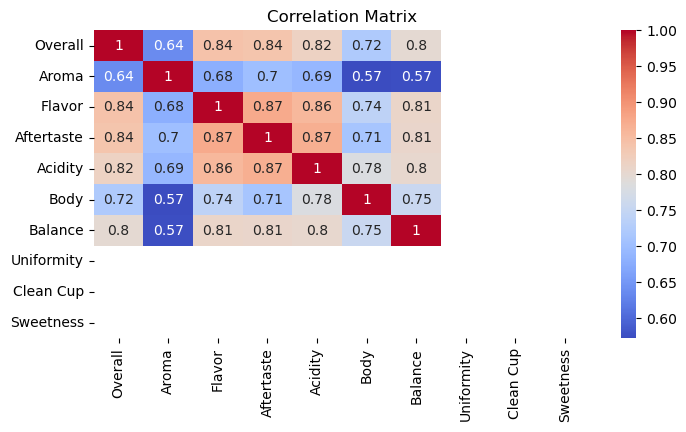

In [11]:
# Explore the correlation between variables using a heatmap
heatmap_cols=["Overall","Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean Cup","Sweetness"]
df_heatmap=df[heatmap_cols]
plt.figure(figsize=(8,4))
sns.heatmap(df_heatmap.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

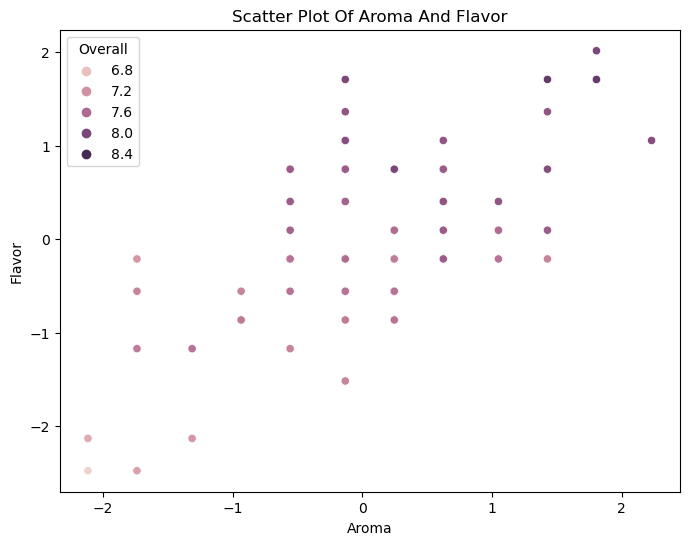

In [12]:
# Scatter plot of "Aroma" and "Flavor" with color-coded "Overall"
plt.figure(figsize=(8,6))
sns.scatterplot(x="Aroma", y="Flavor", hue="Overall", data=df)
plt.title("Scatter Plot Of Aroma And Flavor")
plt.show()

# Data Preparation For machine learning

In [13]:
# Select the relevant columns for the machine learning model

features=["Overall","Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean Cup","Sweetness"]
target="Overall"

# Create the feature matrix X and the target vector y
X=df[features]
y=df[target]

# Split the data into train and testing sets

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling on training and testing sets
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


# Training and evaluating machine learning models